In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Image filtering

## Image filtering theory

Filtering is one of the most basic and common image operations in image processing. You can filter an image to remove noise or to enhance features; the filtered image could be the desired result or just a preprocessing step. Regardless, filtering is an important topic to understand.

## Local filtering

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap']='gray'

The "local" in local filtering simply means that a pixel is adjusted by values in some surrounding neighborhood. These surrounding elements are identified or weighted based on a "footprint", "structuring element", or "kernel".

Let's go to back to basics and look at a 1D step-signal

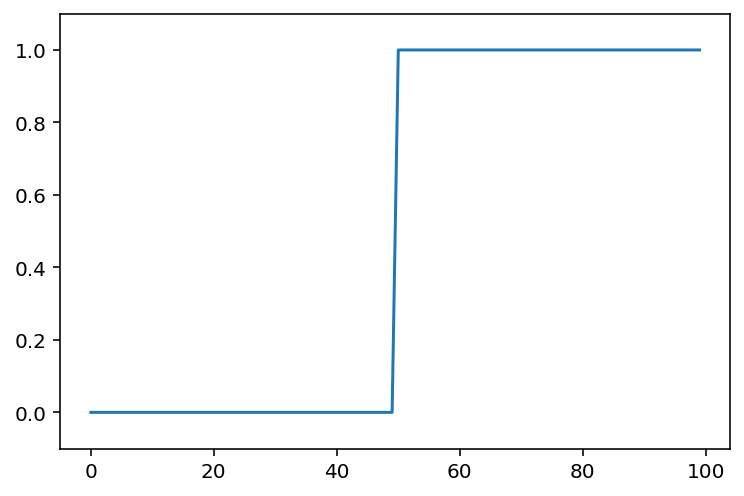

In [6]:
step_signal=np.zeros(100)
step_signal[50:]=1
fig,ax=plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1)

Now add some noise to this signal

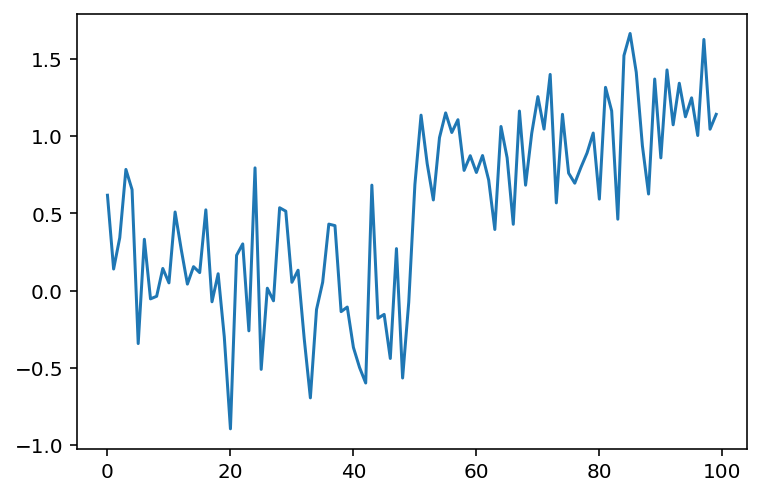

In [10]:
np.random.seed(0)


noisy_signal = (step_signal
                + np.random.normal(0,0.35 , step_signal.shape))
fig, ax = plt.subplots()
ax.plot(noisy_signal);

The simplest way to recover something that looks a bit more like the original signal is to tak the average between neighboring 'pixels'.

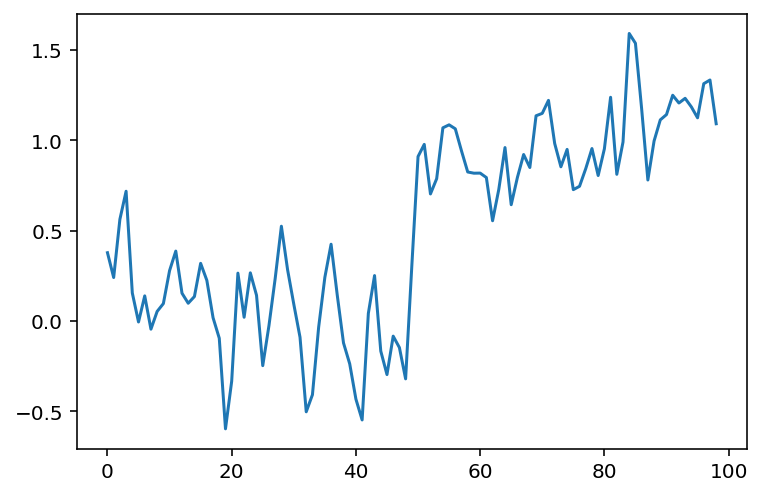

In [12]:
# Take the mean of neighboring pixels
smooth_signal=(noisy_signal[:-1]+noisy_signal[1:])/2.0
fig,ax=plt.subplots()
ax.plot(smooth_signal)

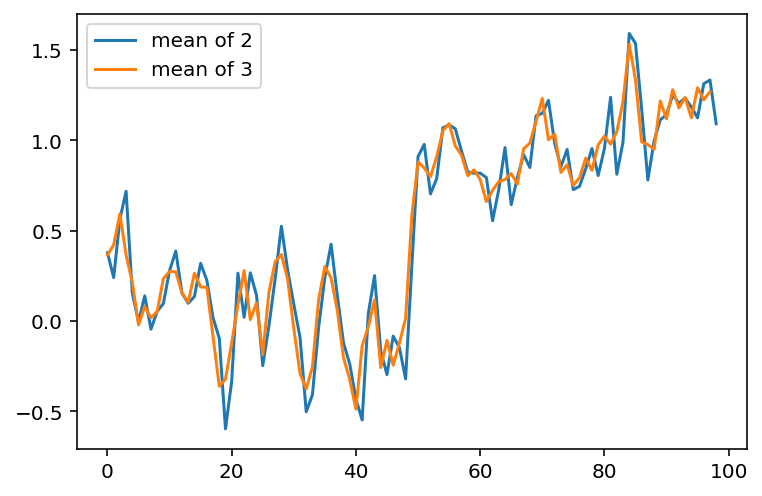

In [13]:
# Take the mean of three neghboring pixels
smooth_signal3 = (noisy_signal[:-2] + noisy_signal[1:-1]
                  + noisy_signal[2:]) / 3
fig, ax = plt.subplots()
ax.plot(smooth_signal, label='mean of 2')
ax.plot(smooth_signal3, label='mean of 3')
ax.legend(loc='upper left');

smooth_signal3 and smooth_signal3p are equal: True


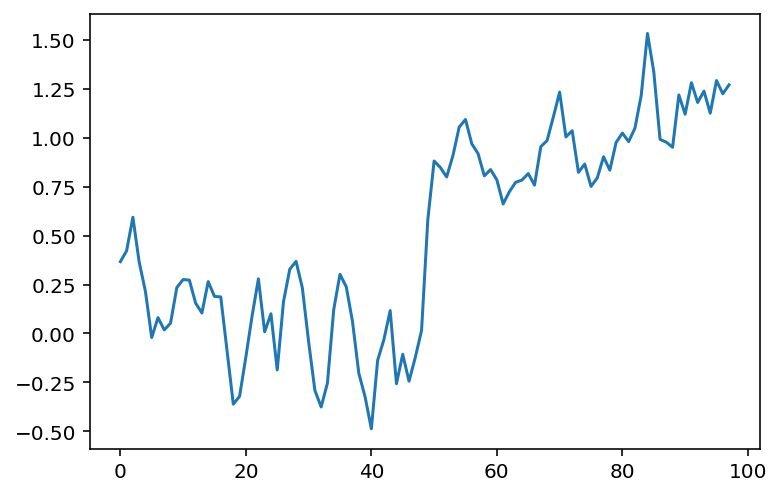

In [14]:
 #Same as above, using a convolution kernel
# Neighboring pixels multiplied by 1/3 and summed
mean_kernel3 = np.full((3,), 1/3)
smooth_signal3p = np.convolve(noisy_signal, mean_kernel3,
                              mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal3p)

print('smooth_signal3 and smooth_signal3p are equal:',
      np.allclose(smooth_signal3, smooth_signal3p))

In [15]:
def convolve_demo(signal, kernel):
    ksize = len(kernel)
    convolved = np.correlate(signal, kernel)
    def filter_step(i):
        fig, ax = plt.subplots()
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        ax.scatter(np.arange(i, i+ksize),
                   signal[i : i+ksize])
        ax.scatter(i, convolved[i])
    return filter_step

from ipywidgets import interact, widgets

i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 3,
                             value=0)

interact(convolve_demo(noisy_signal, mean_kernel3),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=97), Output()), _dom_classes=('widget-interact',…

The advantage of cnvolution is that it's just as eay to take the average of 11  points as 3.

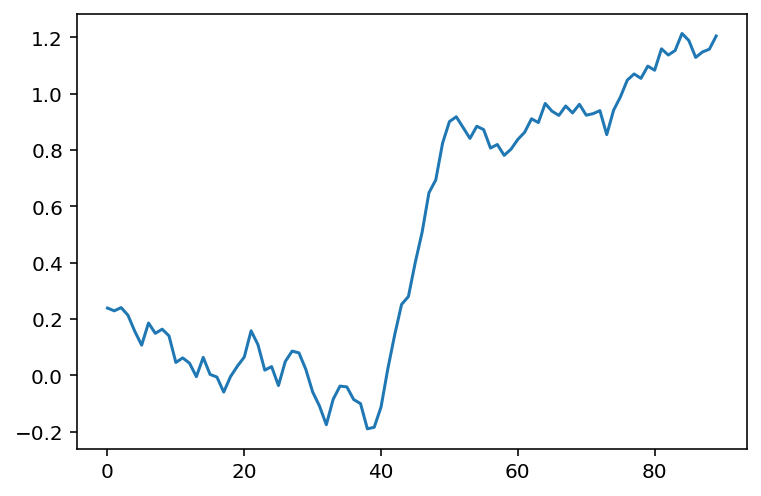

In [16]:
mean_kernel11 = np.full((11,), 1/11)
smooth_signal11 = np.convolve(noisy_signal, mean_kernel11,
                              mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal11);

In [17]:
i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 11,
                             value=0)

interact(convolve_demo(noisy_signal, mean_kernel11),
         i=i_slider);


interactive(children=(IntSlider(value=0, description='i', max=89), Output()), _dom_classes=('widget-interact',…

 Of course , to take the mean of 11 values ,we have to move further an dfurther away from the edges ,a nd this starts to be noticeable .You can use mode='same' to pad the edges of the array and compute a result of the same size as the input.

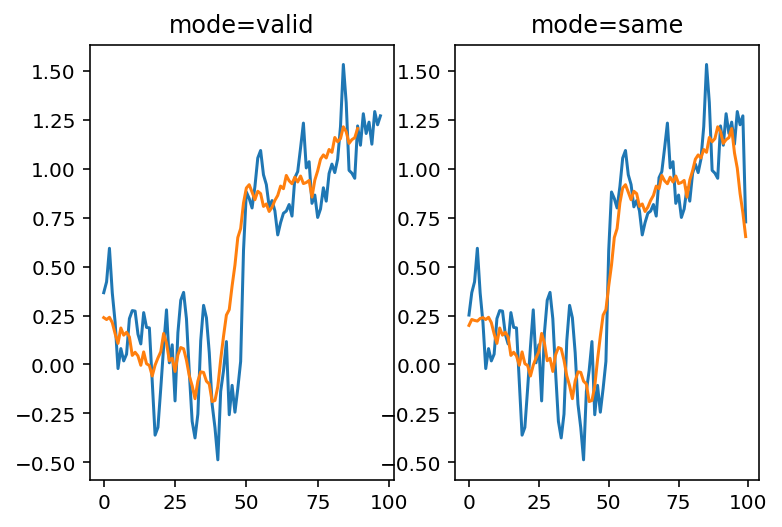

In [18]:
smooth_signal3same = np.convolve(noisy_signal, mean_kernel3,
                                 mode='same')
smooth_signal11same = np.convolve(noisy_signal, mean_kernel11,
                                  mode='same')

fig, ax = plt.subplots(1, 2)
ax[0].plot(smooth_signal3p)
ax[0].plot(smooth_signal11)
ax[0].set_title('mode=valid')
ax[1].plot(smooth_signal3same)
ax[1].plot(smooth_signal11same)
ax[1].set_title('mode=same');

In [19]:
def convolve_demo_same(signal, kernel):
    ksize = len(kernel)
    padded_signal = np.pad(signal, ksize // 2,
                           mode='constant')
    convolved = np.correlate(padded_signal, kernel)
    def filter_step(i):
        fig, ax = plt.subplots()
        x = np.arange(-ksize // 2,
                      len(signal) + ksize // 2)
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        start, stop = i, i + ksize
        ax.scatter(x[start:stop]+1,
                   padded_signal[start : stop])
        ax.scatter(i, convolved[i])
        ax.set_xlim(-ksize // 2,
                    len(signal) + ksize // 2)
    return filter_step


i_slider = widgets.IntSlider(min=0, max=len(noisy_signal)-1,
                             value=0)

interact(convolve_demo_same(noisy_signal, mean_kernel11),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

### A different filter

 Let's look again at our simplest signal,the steo signal from before.

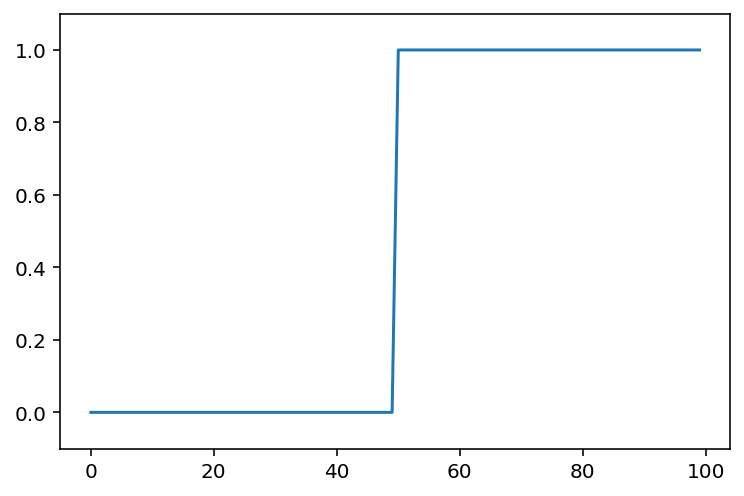

In [24]:
fig,ax=plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1)

In [25]:
result_corr = np.correlate(step_signal, np.array([-1, 0, 1]),
                           mode='valid')

In [26]:
result_conv = np.convolve(step_signal, np.array([-1, 0, 1]),
                          mode='valid')

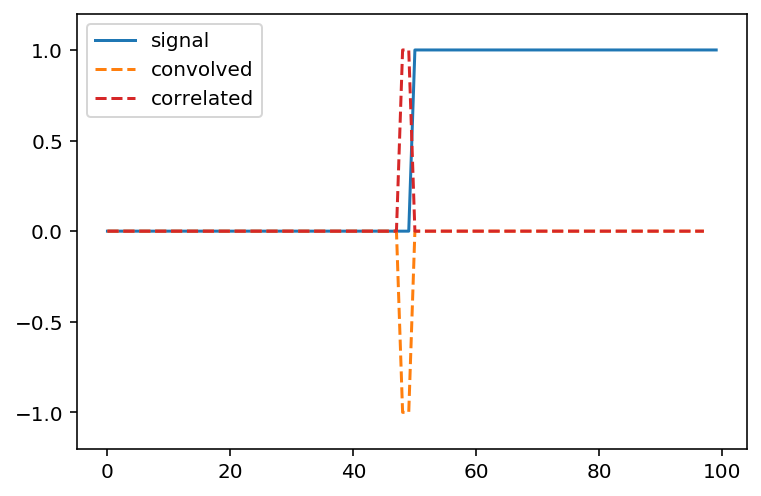

In [27]:
fig, ax = plt.subplots()
ax.plot(step_signal, label='signal')
ax.plot(result_conv, linestyle='dashed', label='convolved')
ax.plot(result_corr, linestyle='dashed', label='correlated',
        color='C3')
ax.legend(loc='upper left')
ax.margins(y=0.1) 

Whenever neighboring values are close, the filter response is close to 0. Right at the boundary of a step, we're subtracting a small value from a large value and and get a spike in the response. This spike "identifies" our edge.

What if we apply the same trick with our noisy signal

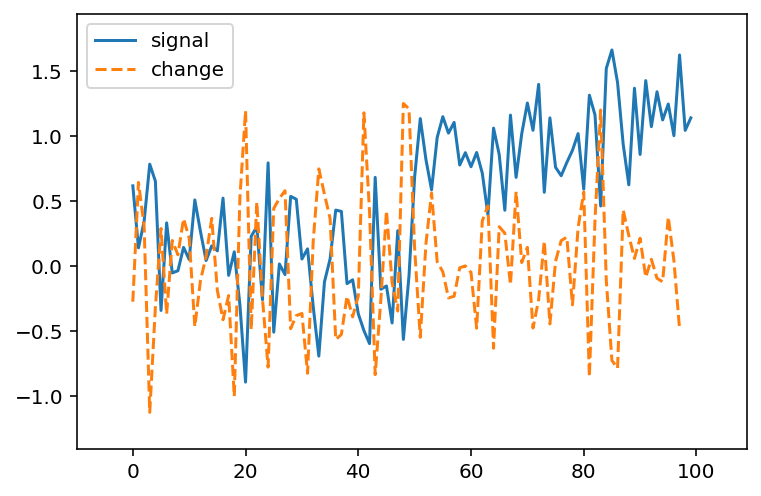

In [28]:
noisy_change = np.correlate(noisy_signal, np.array([-1, 0, 1]))
fig, ax = plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(noisy_change, linestyle='dashed', label='change')
ax.legend(loc='upper left')
ax.margins(0.1)

Here we lost our edge

But recall that we smoothed the signal a bit by taking its neighbors. Perhaps we can do the same thing here. Actually, it turns out that we can do it *in any order*, so we can create a filter that combines both the difference and the mean:

In [29]:
mean_diff = np.correlate([-1, 0, 1], [1/3, 1/3, 1/3], mode='full')
print(mean_diff)

[-0.33333333 -0.33333333  0.          0.33333333  0.33333333]


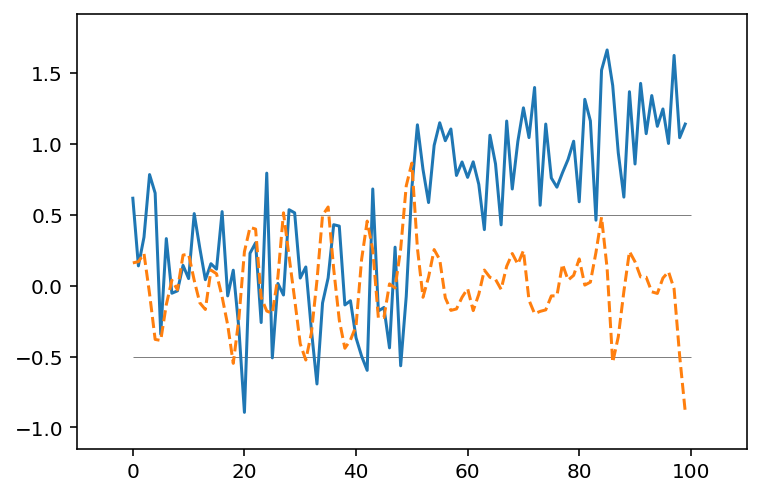

In [30]:
smooth_change = np.correlate(noisy_signal, mean_diff,
                             mode='same')
fig, ax = plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(smooth_change, linestyle='dashed', label='change')
ax.margins(0.1)
ax.hlines([-0.5, 0.5], 0, 100, linewidth=0.5, color='gray');

**Exercise:** The Gaussian filter with variance $\sigma^2$ is given by:

$$
k_i = \frac{1}{\sqrt{2\pi}\sigma}\exp{\left(-\frac{(x_i - x_0)^2}{2\sigma^2}\right)}
$$

1. Create this filter (for example, with width 9, center 4, sigma 1). (Plot it)
2. Convolve it with the difference filter (with appropriate mode). (Plot the result)
3. Convolve it with the noisy signal. (Plot the result)